# Homework 3

- Understanding Bracket
- Understanding Fibonacci Search
- Understanding Golder Section Search
- Reproducing this graph

![caption here](Images/Image_hw3.png "Title")

## Bracket

Bracketing method for univariate functions is a process of identifying an interval in which a local minimum lies. Here is an example code:

In [1]:
function bracket_minimum(f, x=0; s=1e-2, k=2.0)
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    end
    while true
        c, yc = b + s, f(b + s)
        if yc > yb
            return a < c ? (a, c) : (c, a)
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
    end
end

bracket_minimum (generic function with 2 methods)

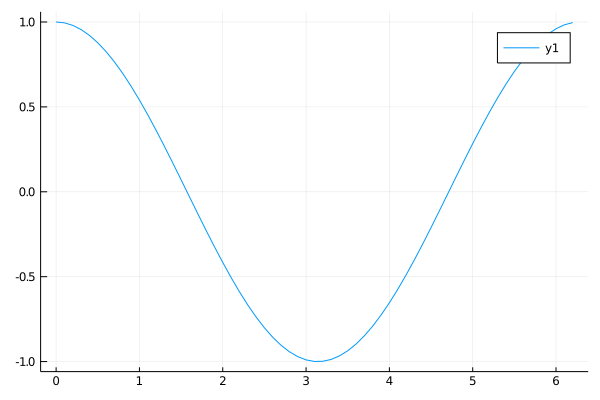

In [2]:
using Plots

# Example function
f(x) = cos(x)
plot(0:0.1:2π, f)

In [3]:
print("The interval which contains local minimum of f(x) is ", bracket_minimum(f))

The interval which contains local minimum of f(x) is (1.28, 5.12)

## Fibonacci Search

In [4]:
# From recursive method one can determine a Fibonacci sequence.
using Printf

function fibonacci(n)
    if n < 0
        println("Incorrect input")
    elseif n == 1
        return 0
    elseif n == 2
        return 1
    else
        return fibonacci(n-1)+fibonacci(n-2)
    end
end

for i = 1:11
    println("Sequence", " ", i, "  ", fibonacci(i))
end

Sequence 1  0
Sequence 2  1
Sequence 3  1
Sequence 4  2
Sequence 5  3
Sequence 6  5
Sequence 7  8
Sequence 8  13
Sequence 9  21
Sequence 10  34
Sequence 11  55


In [5]:
# Another method of determining a Fibonacci sequence is using Binet's formula

ϕ = (1 + sqrt(5)) / 2
Binet(n) = (ϕ^n - (1 - ϕ)^n) / sqrt(5)

for i = 1:11
    println("Sequence", " ", i, "  ", floor(Int, Binet(i-1)))
end

Sequence 1  0
Sequence 2  1
Sequence 3  1
Sequence 4  2
Sequence 5  3
Sequence 6  5
Sequence 7  8
Sequence 8  13
Sequence 9  21
Sequence 10  34
Sequence 11  55


In [6]:
function fibonacci_search(f, a, b, n) 
    A, B = Any[], Any[]
    ε=0.01
    ϕ = (1+√5)/2
    s = (1-√5)/(1+√5)
    ρ = 1 / (ϕ*(1-s^(n+1))/(1-s^n))
    d = ρ*b + (1-ρ)*a
    yd = f(d)
    append!(A, a)
    append!(B, b)
    @printf("%d %6.3f %6.3f %6.3f %6.3f \n", 0, a, 0, d, b)
    for i in 1 : n-1
        if i == n-1
            c = ε*a + (1-ε)*d 
        else
            c = ρ*a + (1-ρ)*b 
        end
        yc = f(c) 
        if yc < yd
            b, d, yd = d, c, yc
            
        else
            a, b = b, c 
        end
        append!(A, a)
        append!(B, b)
        ρ = 1 / (ϕ*(1-s^(n-i+1))/(1-s^(n-i))) 
        @printf("%d %6.3f %6.3f %6.3f \n", i, a, b, abs(a-b))
    end
    return A, B #a < b ? (a, b) : (b, a)
end

fibonacci_search (generic function with 1 method)

In [7]:
A, B = fibonacci_search(f, 0, 6, 10)
if A[length(A)] < B[length(B)]
    println("The bracket from fibonacci search is: ", A[length(A)], ", ", B[length(B)])
else
    println("The bracket from fibonacci search is: ", B[length(B)], ", ", A[length(A)])
end

0  0.000  0.000  3.708  6.000 
1  6.000  2.292  3.708 
2  2.292  4.584  2.292 
3  2.292  3.708  1.416 
4  3.708  2.831  0.876 
5  2.831  3.371  0.539 
6  3.371  3.034  0.337 
7  3.034  3.236  0.202 
8  3.236  3.101  0.135 
9  3.101  3.169  0.068 
The bracket from fibonacci search is: 3.1011235955056184, 3.1692134831460677


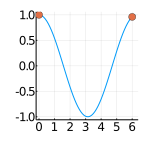

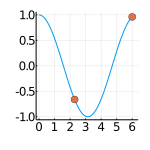

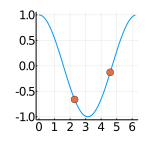

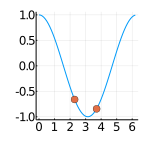

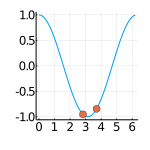

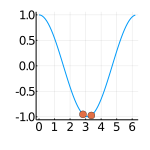

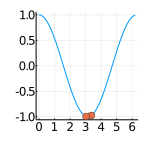

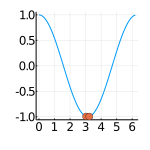

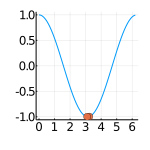

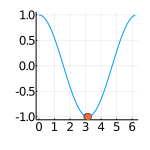

In [8]:
for i = 1:length(A)
    plot(0:0.1:2π, f, legend=false, size=(150, 150))
    display(scatter!([A[i], B[i]], [f(A[i]), f(B[i])]))
end

## Golden Section Search

In [9]:
function golden_section_search(f, a, b, n) 
    A, B = Any[], Any[]
    ϕ = (1+√5)/2
    ρ = ϕ-1
    d = ρ * b + (1 - ρ)*a 
    yd = f(d)
    append!(A, a)
    append!(B, b)
    for i = 1 : n-1
        c = ρ*a + (1 - ρ)*b 
        yc = f(c)
        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c 
        end
        append!(A, a)
        append!(B, b)
        @printf("%d %6.3f %6.3f %6.3f\n", i, a, b, abs(a-b))
    end
return A, B #a < b ? (a, b) : (b, a)
end

golden_section_search (generic function with 1 method)

In [10]:
x1, x2 = golden_section_search(f, 0, 6, 10)
if x1[length(x1)] < x2[length(x2)]
    println("The bracket from fibonacci search is: ", x1[length(x2)], ", ", x1[length(x2)])
else
    println("The bracket from fibonacci search is: ", x1[length(x2)], ", ", x1[length(x2)])
end

1  6.000  2.292  3.708
2  2.292  4.584  2.292
3  2.292  3.708  1.416
4  3.708  2.833  0.875
5  2.833  3.374  0.541
6  3.374  3.039  0.334
7  3.039  3.246  0.207
8  3.039  3.167  0.128
9  3.167  3.088  0.079
The bracket from fibonacci search is: 3.1671842700025232, 3.1671842700025232


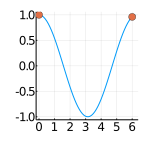

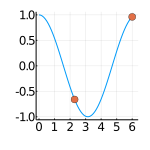

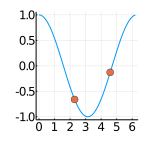

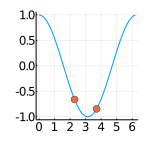

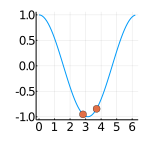

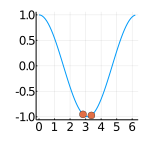

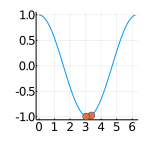

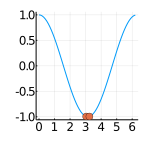

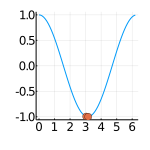

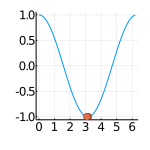

In [11]:
for i = 1:length(x1)
    plot(0:0.1:2π, f, legend=false, size=(150, 150))
    display(scatter!([x1[i], x2[i]], [f(x1[i]), f(x2[i])]))
end